# Project: IMDM Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## <a id='intro'></a>
## Introduction

> In this project I will be analysing data associated with the IMDM movies. It contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. 
In particular, I will be interested in finding trends among the popularity genres, ratings, and revenue over time. Following are the points which could be analysed using the visualization of the datasets:

1- Profit Trends of movies over time to find the most profitable movie

2- Average runtime of the movies

3- Popular genres which is mostly watched

4- Budget, revenue, and profit distribution: maximum and minimum budget and revenue



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
movie_df = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv')
movie_df. head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


## Data Wrangling
### General Observations

There are 10866 observations (rows) with 21 columns in the given data set. Null values are present in below columns:
"imdb_id" , "cast" , "homepage" , "director" , "tagline" , "keywords" , "overview" , "genres" , "production_companies"

For further analysing of data need to drop unused columns, drop duplicate rows and rows with null values for genres since it is used for answering some of the above questions. In addition to answering the questions, it is essential to calculate profit column as well as split the "genres" column. 

In [3]:
movie_df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
#checking whether there is null values
movie_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Data Cleaning
In this section, I am going to clean the data by droppoing dublicates as well as removing unused columns and rows. Also, there are 9 culumns with missing values. Except column "Genres", the number of missing rows in other columns are significantly high, I won't delete these rows. These rows will get 0 value. Column "Genres" has 23 missing rows that will be dropped. 

#### Removing duplicate records

In [5]:
#It delete the rows only when any column has null values except first appearance
movie_df.drop_duplicates(keep='first',inplace = True)

#### Deleting Unused columns

In [6]:
#filtering of columns which is needed or useful for analysis of the data of the movie dataframe
filter_column=[ 'id', 'imdb_id', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average']

#storing the filtered column in imdb_movies using drop()
movie_df=movie_df.drop(filter_column,axis=1)
movie_df.head()

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2015


In [7]:
#displaying the names of selected columns
movie_df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'tagline', 'runtime', 'genres', 'release_date', 'release_year'],
      dtype='object')

In [8]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 11 columns):
popularity        10865 non-null float64
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
cast              10789 non-null object
director          10821 non-null object
tagline           8041 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
release_date      10865 non-null object
release_year      10865 non-null int64
dtypes: float64(1), int64(4), object(6)
memory usage: 1018.6+ KB


In [9]:
#Removing rows which has 'genres' value empty
movie_df.dropna(subset=['genres'], inplace=True)

In [10]:
#Replace data which has 0 with NaN and Removing rows which has NaN for value in any column/row
movie_df=movie_df.replace(0,np.NaN)
movie_df=movie_df.dropna()

In [11]:
#converting popularity ,runtime , budget and revenue to int type
movie_df[['popularity','runtime']] = movie_df[['popularity','runtime']].applymap(np.int64)


In [12]:
#changing the DataTypes of relese_date from string to datetime type
movie_df['release_date']=pd.to_datetime(movie_df.release_date)
movie_df.head()

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,32,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,28,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,13,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,11,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,9,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015


In [13]:
#Printing information about filtered data
print('Total rows and coulmns after data cleaning',movie_df.shape)
movie_df.info()

Total rows and coulmns after data cleaning (3572, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3572 entries, 0 to 10848
Data columns (total 11 columns):
popularity        3572 non-null int64
budget            3572 non-null float64
revenue           3572 non-null float64
original_title    3572 non-null object
cast              3572 non-null object
director          3572 non-null object
tagline           3572 non-null object
runtime           3572 non-null int64
genres            3572 non-null object
release_date      3572 non-null datetime64[ns]
release_year      3572 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 334.9+ KB


## Exploratory Data Analysis

### Profit Trends of movies over time to find the most profitable movie
Maximum profit was in the year 2015 and Minimum profit was in the year 1966. profits are increasing from year 1980.

In [14]:
#Profit earned =income - expenditure (basic concept)
#and inserting the profit collumns at index[7]
movie_df.insert(7,'profit',movie_df['revenue']-movie_df['budget'])
movie_df. describe()

,popularity,budget,revenue,profit,runtime,release_year
count,3572.000000,3.572000e+03,3.572000e+03,3.572000e+03,3572.000000,3572.000000
mean,0.753919,3.871475e+07,1.138337e+08,7.511899e+07,109.122900,2001.178891
std,1.515596,4.294326e+07,1.808765e+08,1.545935e+08,19.686816,11.297047
min,0.000000,1.000000e+00,2.000000e+00,-4.139124e+08,26.000000,1960.000000
25%,0.000000,1.000000e+07,1.579268e+07,-5.251055e+05,96.000000,1995.000000
50%,0.000000,2.500000e+07,5.000625e+07,2.317012e+07,106.000000,2004.000000
75%,1.000000,5.000000e+07,1.337272e+08,8.958184e+07,119.000000,2010.000000
max,32.000000,4.250000e+08,2.781506e+09,2.544506e+09,338.000000,2015.000000


#### Defining the function

In [15]:
#defining the function

def Calculate_with_function(column):
    # maximum profit
    max_profit= movie_df[column].idxmax()
    max_profit=pd.DataFrame(movie_df.loc[max_profit])
    
    # Min profit
    min_profit= movie_df[column].idxmin()
    min_profit=pd.DataFrame(movie_df.loc[min_profit])
    
    #concatenating max_profit and min_profit
    info=pd.concat([max_profit, min_profit], axis=1)
    
    return info

#calling the function
Calculate_with_function('profit')

,1386,2244
popularity,9,0
budget,2.37e+08,4.25e+08
revenue,2.78151e+09,1.10876e+07
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
profit,2.54451e+09,-4.13912e+08
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller


In [16]:
#function call
#using the above function to calculate maximum revenue and minimum revenue
Calculate_with_function('revenue')

,1386,8142
popularity,9,0
budget,2.37e+08,6e+06
revenue,2.78151e+09,2
original_title,Avatar,Mallrats
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Jason Lee|Jeremy London|Shannen Doherty|Claire...
director,James Cameron,Kevin Smith
tagline,Enter the World of Pandora.,They're not there to shop. They're not there t...
profit,2.54451e+09,-6e+06
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Romance|Comedy


In [17]:
def find_trend(column_x,column_y):
    #set graph size
    plt.figure(figsize=(5,3), dpi = 120)
    #plotting the graph
    plt.plot(movie_df.groupby(column_x)[column_y].sum())
    movie_df.groupby(column_x)[column_y].sum().describe()
    max_value = movie_df.groupby(column_x)[column_y].sum().idxmax()
    min_value = movie_df.groupby(column_x)[column_y].sum().idxmin()
    return max_value,min_value,plt

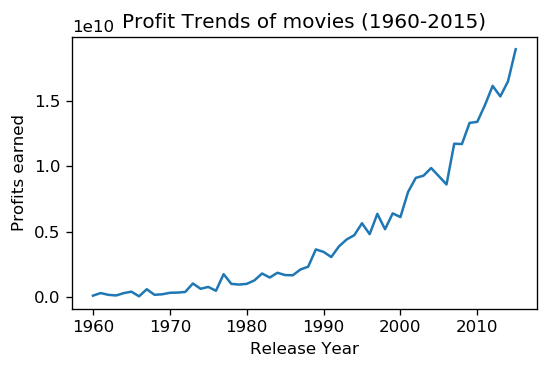

Maximum profitable year 2015
Minimum profitable year 1966


In [18]:
#Labeling the graph : x-axis,y-axis and Title. Calling function find_trend with parameters release_year and profit to show graph and max/min values for profit over the years
maxval,minval,plt=find_trend('release_year','profit')
#x-axis label
plt.xlabel('Release Year', fontsize = 10)
#y-axis label
plt.ylabel('Profits earned', fontsize = 10)
#title of the graph
plt.title('Profit Trends of movies (1960-2015)')
plt.show()
print('Maximum profitable year',maxval)
print('Minimum profitable year',minval)


### Average runtime of the movies
Average runtime of the movies is 109 minutes. According to the histogram, movies' running time skrew to right. 

In [19]:
#Defing the function to calculate the average movies runtime
def avg_runtime(time):
    return movie_df[time].mean()


#calling rhe above defined function
print(f"Average Movies Running Time {avg_runtime('runtime')}")

Average Movies Running Time 109.12290033594626


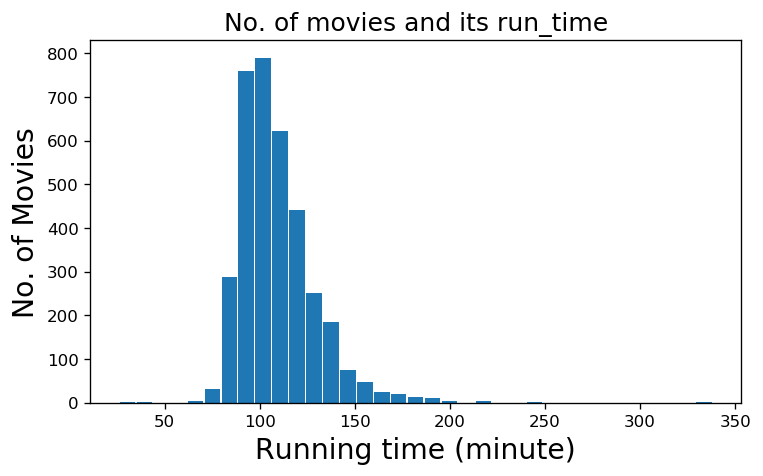

In [20]:
#Plotting a graph between the number of movies and its run time

#plotting a figure(outline) and its size
plt.figure(figsize=(7,4), dpi = 120)

#Labelling the title
plt.title('No. of movies and its run_time', fontsize=15)

#labelling the x_axis
plt.xlabel('Running time (minute)', fontsize = 17)

#Labelling the y_axis
plt.ylabel('No. of Movies', fontsize=17)

#plotting the  graph using runtime values 
plt.hist(movie_df['runtime'],rwidth = 0.91, bins =35)

#just displaying the plotted graph
plt.show()

In [21]:
#grouping the movies by their released date
profits_over_year = movie_df.groupby('release_year')['profit'].sum()

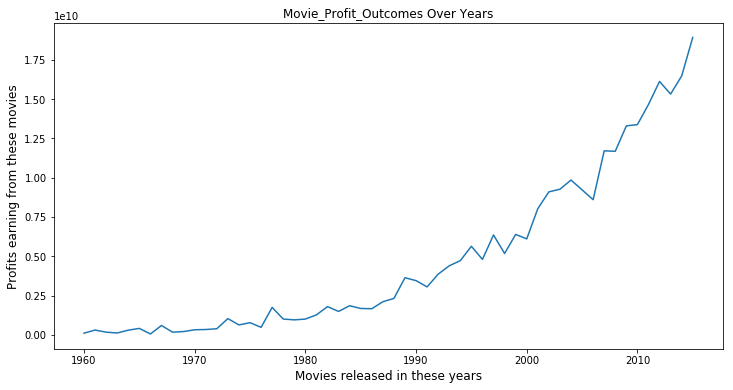

In [22]:
#plotting a figure(outline) and its size
plt.figure(figsize=(12,6))

#Labelling the title
plt.title('Movie_Profit_Outcomes Over Years')

#labelling the x_axis
plt.xlabel('Movies released in these years', fontsize = 12)

#Labelling the y_axis
plt.ylabel('Profits earning from these movies', fontsize = 12)

#plotting the  graph using profits_over_year(group_by_years) values 
plt.plot(profits_over_year)

### Popular genres which is mostly watched

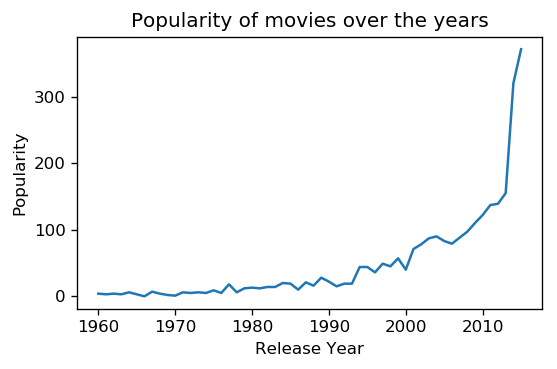

Most Popular year for movies 2015
Least Popular year for movies 1966


In [23]:
maxval,minval,plt=find_trend('release_year','popularity')
#x-axis label
plt.xlabel('Release Year', fontsize = 10)
#y-axis label
plt.ylabel('Popularity', fontsize = 10)
#title of the graph
plt.title('Popularity of movies over the years')
plt.show()
print('Most Popular year for movies',maxval)
print('Least Popular year for movies',minval)

In [24]:
#defining function to split the genre valus
def data(gen):
    gener = movie_df[gen].str.cat(sep='|')
    gener= pd.Series(gener.split('|'))
    no = gener.value_counts(ascending = False)
    return no

In [25]:
#calling the above function to count
#and assign the splitted genres values
No_of_count=data('genres')
No_of_count.head()

Drama        1572
Comedy       1255
Thriller     1149
Action       1046
Adventure     720
dtype: int64

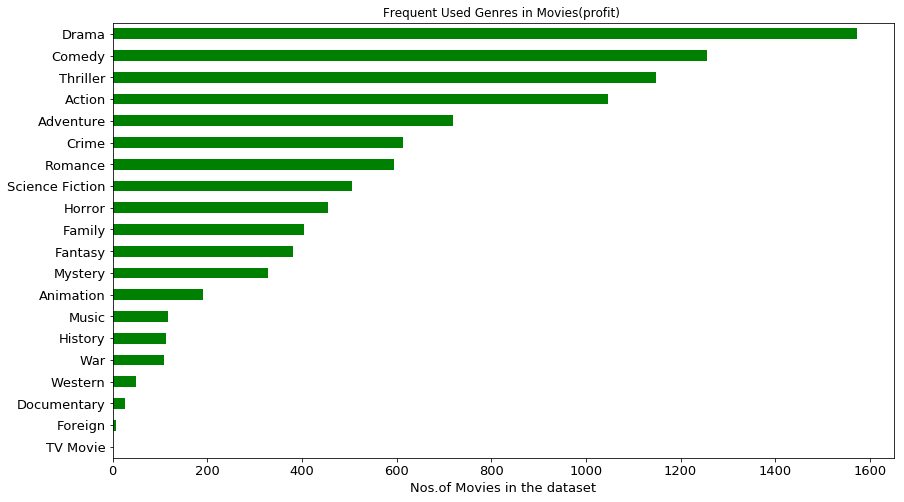

In [26]:
#plotting the most frequent appeared genres

#sorting the counted genres
No_of_count.sort_values(ascending = True, inplace = True)

#drawing the graph horizontally based on No_of_count values
dig = No_of_count.plot.barh(color = 'green', fontsize = 13)

#labelling the title for the graph
dig.set(title = 'Frequent Used Genres in Movies(profit) ')

#labelling the x-axis
dig.set_xlabel('Nos.of Movies in the dataset', color = 'black', fontsize = '13')

#figure size
dig.figure.set_size_inches(14, 8)
plt.show()

### Budget, revenue, and profit distribution

In [27]:
figure = plt.figure(figsize=(10,6),dpi=120)

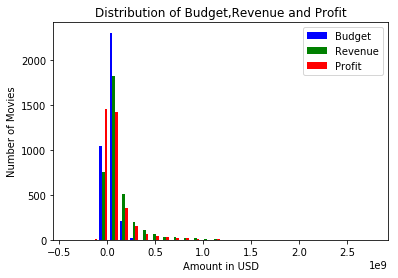

In [39]:
plt.hist([
        movie_df['budget'],movie_df['revenue'],movie_df['profit']
        ], 
         stacked=False, color = ['b','g','r'], bins = 30, label = ['Budget','Revenue', 'Profit'])
###Labeling the graph : x-axis,y-axis and Title
plt.xlabel('Amount in USD')
plt.ylabel('Number of Movies')
plt.title('Distribution of Budget,Revenue and Profit')
### Adding legend 
plt.legend()

In [29]:
#Defining the functions to calculate the average of columns
def avg_data(column):
    return movie_df[column].mean()

In [30]:
#calling function
#calculating average budget for movies
avg_data('budget')

38714747.104143336

In [31]:
#calling function
#calculating the average revenue generater from movies
avg_data('revenue')

113833739.16573349

In [32]:
#calling function
#calculating the average movies_runtime
avg_data('runtime')

109.12290033594626

In [33]:
#calling data function
#counting the appearance of casting members in movies
countin=data('cast')
countin.head()

Robert De Niro       50
Bruce Willis         44
Samuel L. Jackson    43
Nicolas Cage         41
Matt Damon           35
dtype: int64

<a id='conclusions'></a>
## Conclusions

In [34]:
print(f"The average budget of the movies is : {avg_data('budget')}")

The average budget of the movies is : 38714747.10414334


In [35]:
print(f"The average running time of the movies is : {avg_data('runtime')}")

The average running time of the movies is : 109.12290033594626


In [36]:
print(f"The average revenue generated from the movies : {avg_data('revenue')}")

The average revenue generated from the movies : 113833739.16573349


In [40]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0